<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
#This cell includes misc. functions regarding the boston_df
#boston_df.head(5)
#boston_df['MEDV'].info()
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [6]:
from matplotlib import pyplot as plt

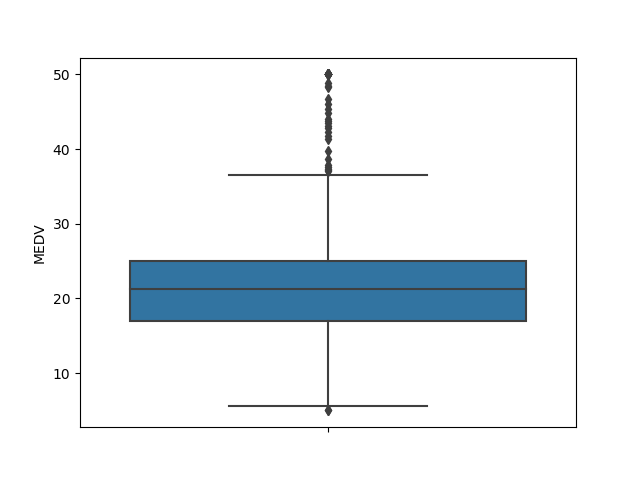

In [7]:
#Boxplot for median value of owner-occupied homes (MEDV)
sns.boxplot(y='MEDV', data=boston_df)
plt.show()

#observations
#  - several outliers (?) beyond MEDV ~35 (up to a max of ~50)

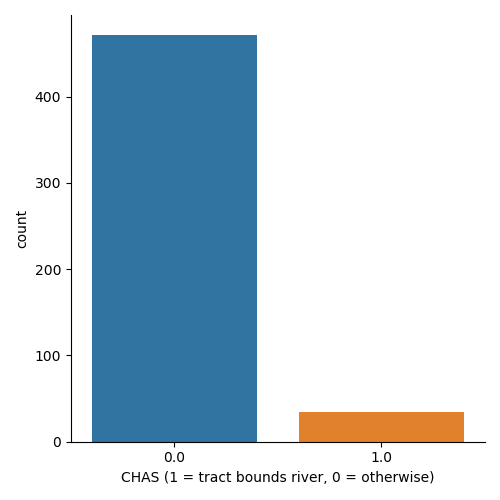

In [8]:
#Bar plot for the dummy Charles River variable (CHAS)
sns.catplot(x='CHAS', kind = 'count', data=boston_df)
plt.xlabel('CHAS (1 = tract bounds river, 0 = otherwise)')
plt.show()

In [9]:
#Boxplot for MEDV vs. proportion of owner-occupied units built prior to 1940  (AGE)
#discretized AGE into three groups: 1) under 35 years (u35), 2) over 70 years (o70), and 3) range from 35-70 years (mid)
u35_df = boston_df[boston_df['AGE'] <= 35]
o70_df = boston_df[boston_df['AGE'] >= 70]
mid_df = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)]
#young_df.head()
#old_df.head()
#middle_df.head()

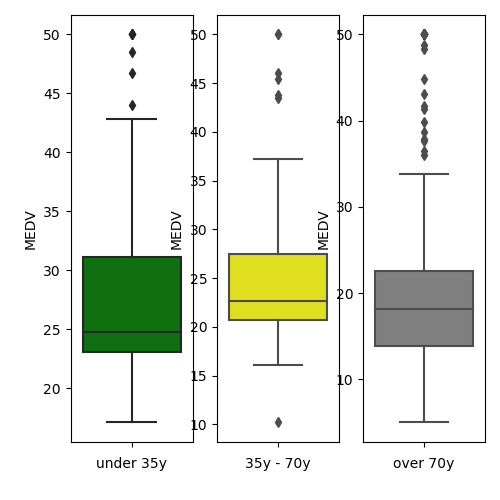

In [10]:
plt.subplot(1,3,1)
sns.boxplot(y='MEDV', data=u35_df, color='green')
plt.xlabel('under 35y')

plt.subplot(1,3,2)
sns.boxplot(y='MEDV', data=mid_df, color='yellow')
plt.xlabel('35y - 70y')

plt.subplot(1,3,3)
sns.boxplot(y='MEDV', data=o70_df, color='gray')
plt.xlabel('over 70y')

plt.show()

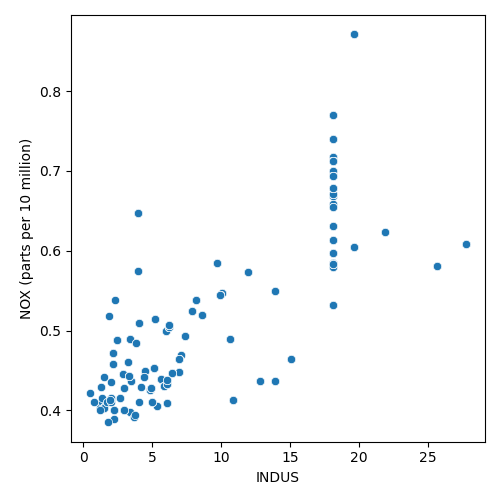

In [11]:
#Scatter plot of nitric oxides concentration (in units of pp 10M) vs. proportion of non-retail business acres per town (INDUS)
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.ylabel('NOX (parts per 10 million)')
plt.show()

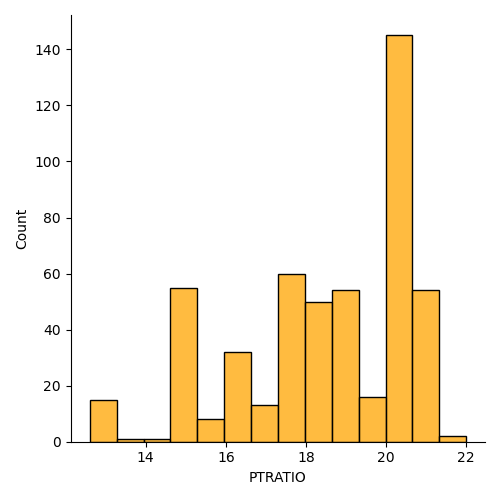

In [12]:
#histogram of pupil to teach ratio (PTRATIO)
sns.displot(boston_df['PTRATIO'], color = 'orange', kde = False)
plt.show()

In [13]:
# Q1 Is there a significant difference in median value of houses bounded by the Charles River or not?  

# 1 - State hypothesis: There is no MEDV difference for houses bounded and unbounded by the Charles River. 
# 2 - Assume an alpha value of 0.05.  
# 3 - Use T-test for independent samples:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [14]:
# 4 - Conclusion from the T-test is that the p-value < 0.05.  
#     Therefore, reject the hull hypothesis (i.e., diff in MEDV is statistically significant)

In [15]:
# Q2 Is there a difference is MEDV for each AGE range 
# (i.e., across each group proportion of owner-occupied units built prior to 1940)?

# 1 - State hypothesis: The population variances for homes under, over, and between 35-70 y are equal.
# 2 - Assume an alpha value of 0.05.
# 3 - Use ANOVA, specifically Levines Test.

#First group the AGE data into categories (one-way ANOVA can't work with a continous variable)
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_group'] = 'under 35y'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_group'] = 'over 70y'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_group'] = '35y - 70y'

In [16]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
AGE_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


In [17]:
scipy.stats.levene(boston_df[boston_df['AGE_group'] == 'under 35y']['MEDV'],
                   boston_df[boston_df['AGE_group'] == 'over 70y']['MEDV'],
                   boston_df[boston_df['AGE_group'] == '35y - 70y']['MEDV'],
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [18]:
# 4 - Conclusion from Levines test is that the p-value > 0.05.  
#     Therefore, accept the hull hypothesis 
#     (i.e., there is no statistically significant difference in MEDV across the home age groupings).

In [19]:
# Q3 Can we conclude there is no relationship between NOX and INDUS?
# (NOX = Nitrix oxide conc., INDUS = proportion of non-retail business acres per town)

# 1 - State hypothesis: There is no correlation between NOX and INDUS.
# 2 - Assume an alpha value of 0.05.
# 3 - Use Pearson Correlation.

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209189, 7.913361061211254e-98)

In [20]:
# 4 - Conclusion from Pearson test is that the p-value << 0.05.  
# Therefore, reject the hull hypothesis # (i.e., there is a linear correlation between NOS and INDUS).

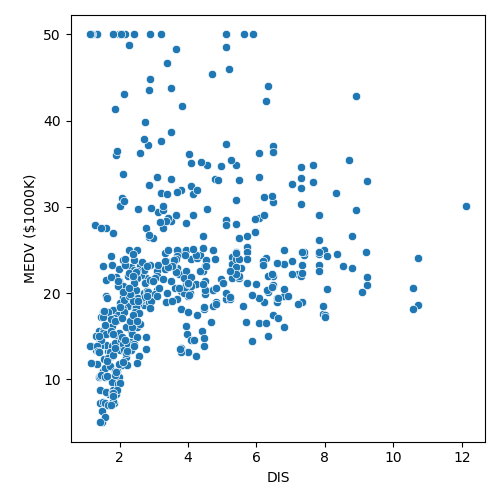

In [21]:
# Q4 What is the impact of DIS on MEDV?
#    (DIS = weighted distance to 5 Boston employment centers)

#Scatter plot of DIS vs. MEDV
ax = sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
plt.ylabel('MEDV ($1000K)')
plt.show()

In [22]:
# 1 - State hypothesis: There is no correlation between MEDV and DIS.
# 2 - Assume an alpha value of 0.05.
# 3 - Use Pearson Correlation.

scipy.stats.pearsonr(boston_df['MEDV'], boston_df['DIS'])

(0.24992873408590383, 1.2066117273368359e-08)

In [23]:
# 4 - Conclusion from Pearson test is that the p-value << 0.05.  
# Therefore, reject the hull hypothesis # (i.e., there is a linear correlation between MEDV and DIS).